                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     38.36
Date:                Sat, 10 May 2025   Prob (F-statistic):           4.90e-32
Time:                        22:31:04   Log-Likelihood:                -63306.
No. Observations:               20858   AIC:                         1.266e+05
Df Residuals:                   20853   BIC:                         1.267e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3356      0.328     13.218   

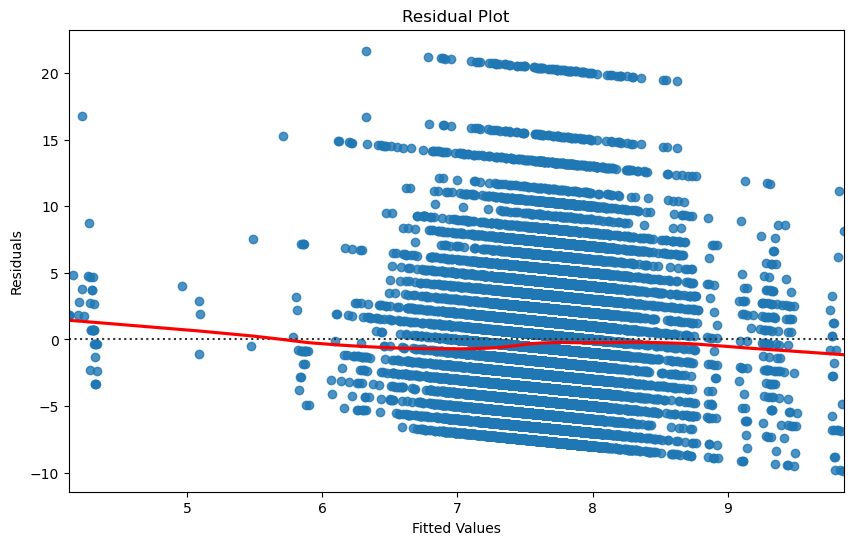

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('data/cleaned_merged_data.csv')

# Ensure all columns are numeric
numeric_columns = ['free_bikes', 'empty_slots', 'distance', 'rating', 'popularity', 'review_count']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Define the dependent variable (target)
y = df['free_bikes']

# Define the independent variables (predictors)
X = df[['distance', 'rating', 'popularity', 'review_count']]

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)

results = model.fit()

# Print the model summary
print(results.summary())

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=results.fittedvalues, y=results.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [6]:
df.corr(numeric_only=True)

,popularity,bike_latitude,bike_longitude,free_bikes,empty_slots,review_count,rating,distance
popularity,1.000000,0.062759,0.044890,0.014992,-0.018203,-0.331370,-0.098216,-0.279154
bike_latitude,0.062759,1.000000,0.041252,0.328729,-0.128792,0.152051,0.164109,-0.109304
bike_longitude,0.044890,0.041252,1.000000,-0.078366,-0.135419,0.060526,0.181739,0.026614
free_bikes,0.014992,0.328729,-0.078366,1.000000,-0.531123,0.044803,0.069081,0.002690
empty_slots,-0.018203,-0.128792,-0.135419,-0.531123,1.000000,-0.018993,-0.067763,-0.000838
review_count,-0.331370,0.152051,0.060526,0.044803,-0.018993,1.000000,0.147563,0.219612
rating,-0.098216,0.164109,0.181739,0.069081,-0.067763,0.147563,1.000000,0.170010
distance,-0.279154,-0.109304,0.026614,0.002690,-0.000838,0.219612,0.170010,1.000000


In [10]:
residuals = results.resid
residuals

0       -3.686935
1       -3.478019
3       -3.027076
5       -3.985111
6       -2.797517
           ...   
23085    1.809224
23086   -1.982276
23087   -1.557644
23088   -1.612333
23089   -1.366001
Length: 20858, dtype: float64

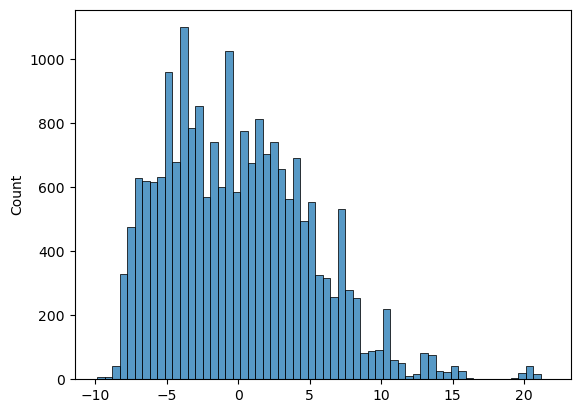

In [11]:
sns.histplot(residuals)
plt.show()

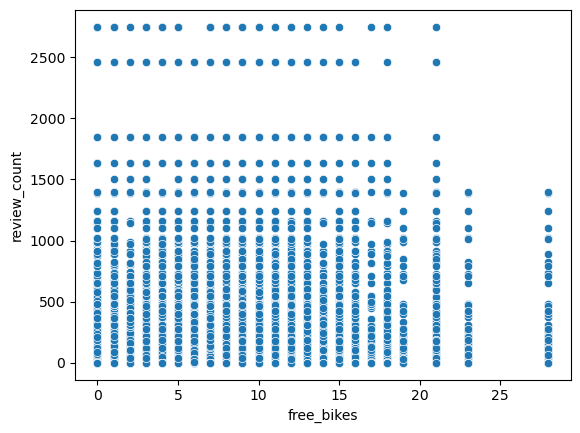

In [15]:
sns.scatterplot(data=df, x='free_bikes', y='review_count')
plt.show()

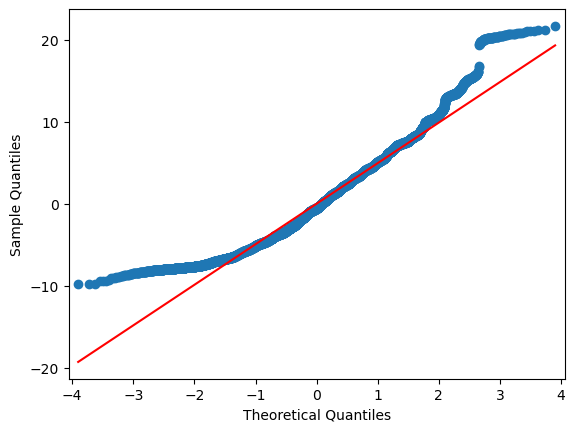

In [18]:
sm.qqplot(residuals, line='r')
plt.show()

In [17]:
stats.shapiro(residuals)

c:\Users\ipeko\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20858.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9654059686568658, pvalue=4.977801942606407e-56)

In [19]:
results.params

const           4.335556
distance       -0.000110
rating          0.770432
popularity      0.365181
review_count    0.000708
dtype: float64

In [37]:
df['rating'] = df['rating'].fillna(df['rating'].mean())

#Simple linear regression model to view the relationship between view and venue distance from station and station bike capacity/total available
y = df['free_bikes']
x = df['rating']
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.14e-23
Time:                        12:41:12   Log-Likelihood:                -70019.
No. Observations:               23090   AIC:                         1.400e+05
Df Residuals:                   23088   BIC:                         1.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3900      0.320     13.740      0.0

In [ ]:
from scipy import stats

stat, p1 = stats.pearsonr(df['popularity'], df['empty_slots'])
stat, p2 = stats.pearsonr(df['review_count'], df['empty_slots'])
stat, p3 = stats.pearsonr(df['popularity'], df['distance'])
stat, p4 = stats.pearsonr(df['review_count'], df['distance'])

print(f'popularity vs empty_slots: p1 = {p1}')
print(f'review_count vs empty_slots: p1 = {p2}')
print(f'popularity vs distance: p1 = {p3}')
print(f'review_count vs distance: p1 = {p4}')

popularity vs empty_slots: p1 = 0.008564476418371578
review_count vs empty_slots: p1 = 0.006085391827871489
popularity vs distance: p1 = 0.0
review_count vs distance: p1 = 3.420911593784791e-226
